<a href="https://colab.research.google.com/github/marinamaer123/new_test/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22HW_11_3_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%BD%D1%96_%D0%B2%D1%96%D0%B7%D1%83%D0%B0%D0%BB%D1%96%D0%B7%D0%B0%D1%86%D1%96%D1%97_%D0%B7_Seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - квартал (1-Q1, 2-Q2, 3-Q3, 4-Q4)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних

---
🌱 Коментар щодо сезонності

Колонка season у датасеті представляє саме квартали року, а не метеорологічні сезони. Тому всі аналізи сезонності ви можете будувати на основі кварталів.

Водночас дані були зібрані в Індії, де поділ на сезони інший, ніж у Європі чи США. Якщо ви хочете дослідити сезонність відповідно до індійської системи сезонів, можна створити окрему колонку.

Справжні сезони в Індії:

| Сезон        | Місяці                     |
| ------------ | -------------------------- |
| Winter       | December–February (12,1,2) |
| Summer       | March–May (3,4,5)          |
| Monsoon      | June–September (6,7,8,9)   |
| Post-monsoon | October–November (10,11)   |


Тоді потрібно зробити нову колонку weather_season_india, мапнувши місяці так:

12, 1, 2 → 1 (Winter)

3, 4, 5 → 2 (Summer)

6–9 → 3 (Monsoon)

10–11 → 4 (Post-Monsoon)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('/content/drive/MyDrive/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [3]:
def map_indian_season(month):
    if month in [12, 1, 2]:
        return 1   # Winter
    elif month in [3, 4, 5]:
        return 2   # Summer
    elif month in [6, 7, 8, 9]:
        return 3   # Monsoon
    else:  # 10, 11
        return 4   # Post-monsoon

df['weather_season_india'] = df['month'].apply(map_indian_season)

In [4]:
df.groupby('weather_season_india')['count'].mean()

,count
weather_season_india,
1,125.753430
2,184.074210
3,236.322359
4,210.688255



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [5]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

In [6]:
sns.set_theme(style="whitegrid")

In [7]:
mean_by_months = df.groupby('month_year')['count'].mean()

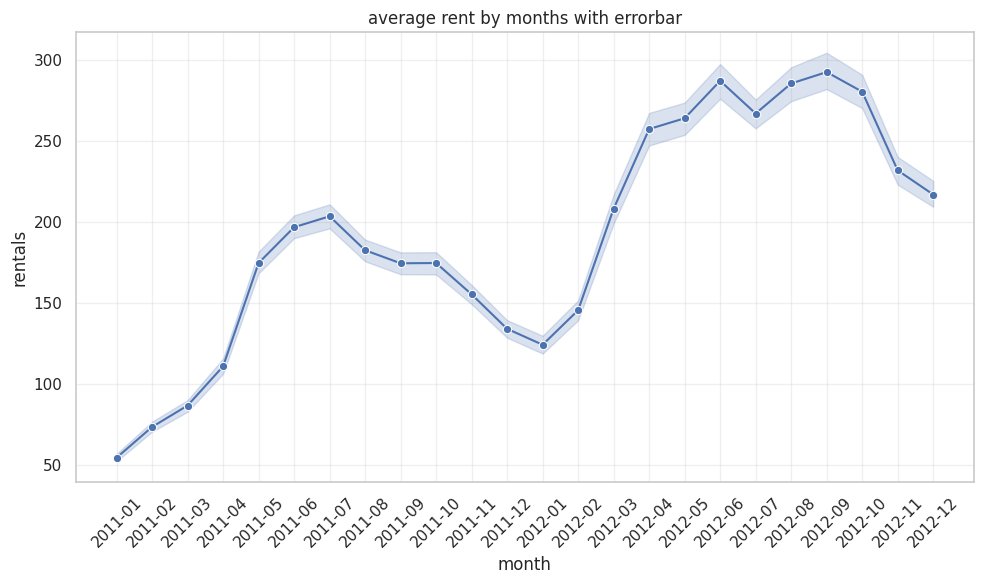

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='month_year',y='count',
             estimator='mean',errorbar =('ci',68),marker='o')
plt.xlabel('month')
plt.ylabel('rentals')
plt.title('average rent by months with errorbar')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

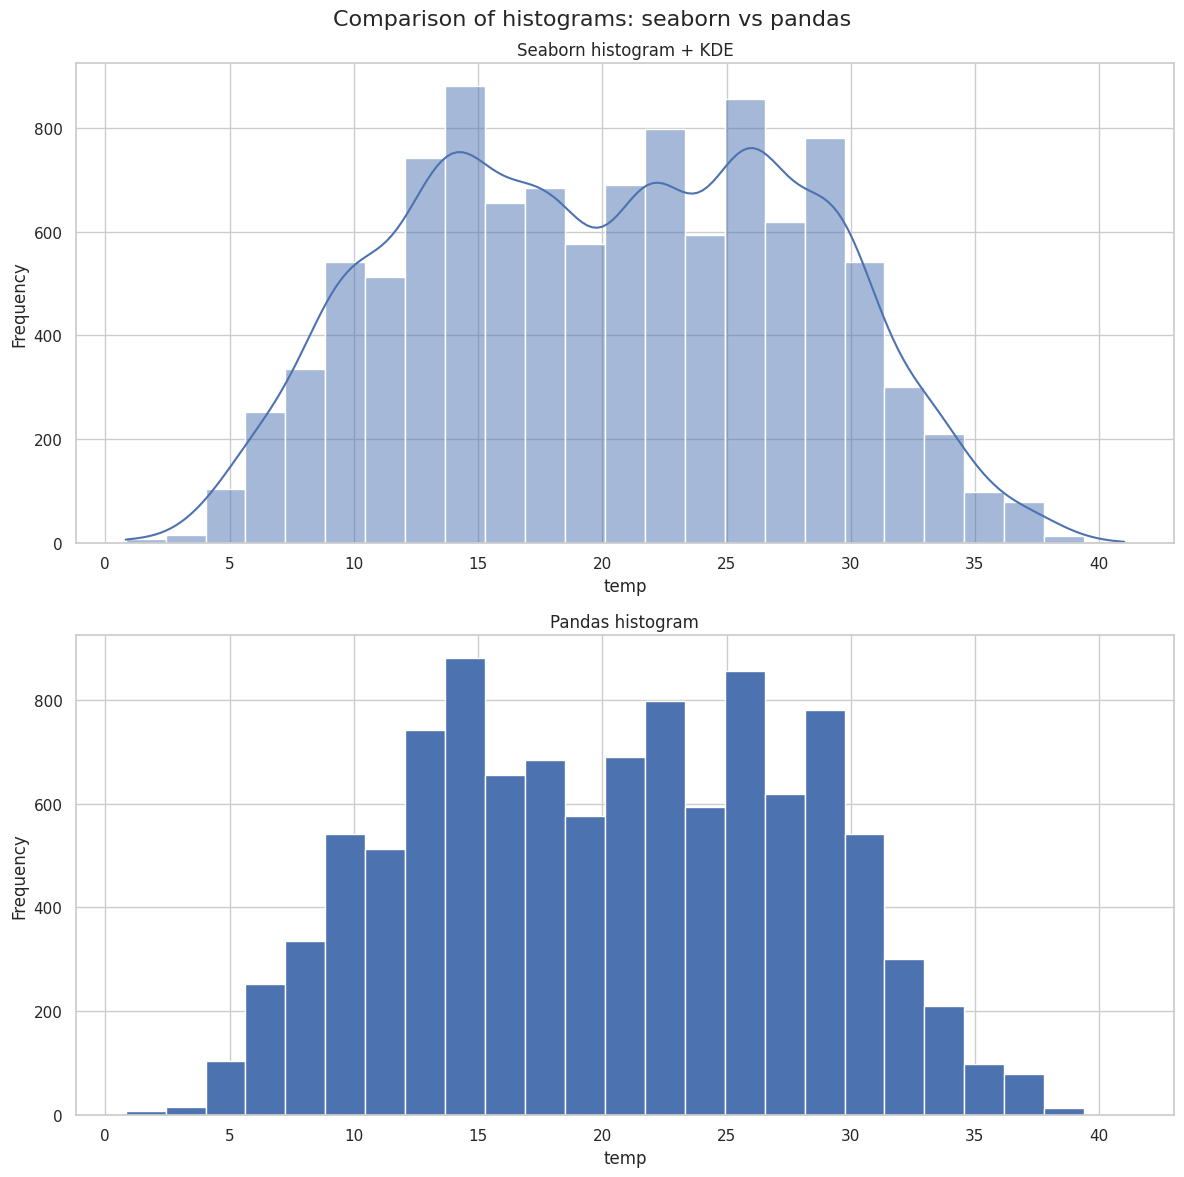

In [9]:
fig,ax=plt.subplots(2,1,figsize=(12,12))
sns.histplot(data=df,x='temp',bins=25,kde=True,ax=ax[0])
ax[0].set_ylabel('Frequency')
ax[0].set_title('Seaborn histogram + KDE')
df['temp'].plot.hist(bins=25,ax=ax[1])
ax[1].set_xlabel('temp')
ax[1].set_title('Pandas histogram')
plt.suptitle('Comparison of histograms: seaborn vs pandas',fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
#Seaborn visualization has more stylish look.More default setting.
#KDE its the line of Kernel Density Estimation .Shows smothed distirbution without step structure.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

In [11]:
box_plot = df.groupby(['hour','weather'])['count'].value_counts()

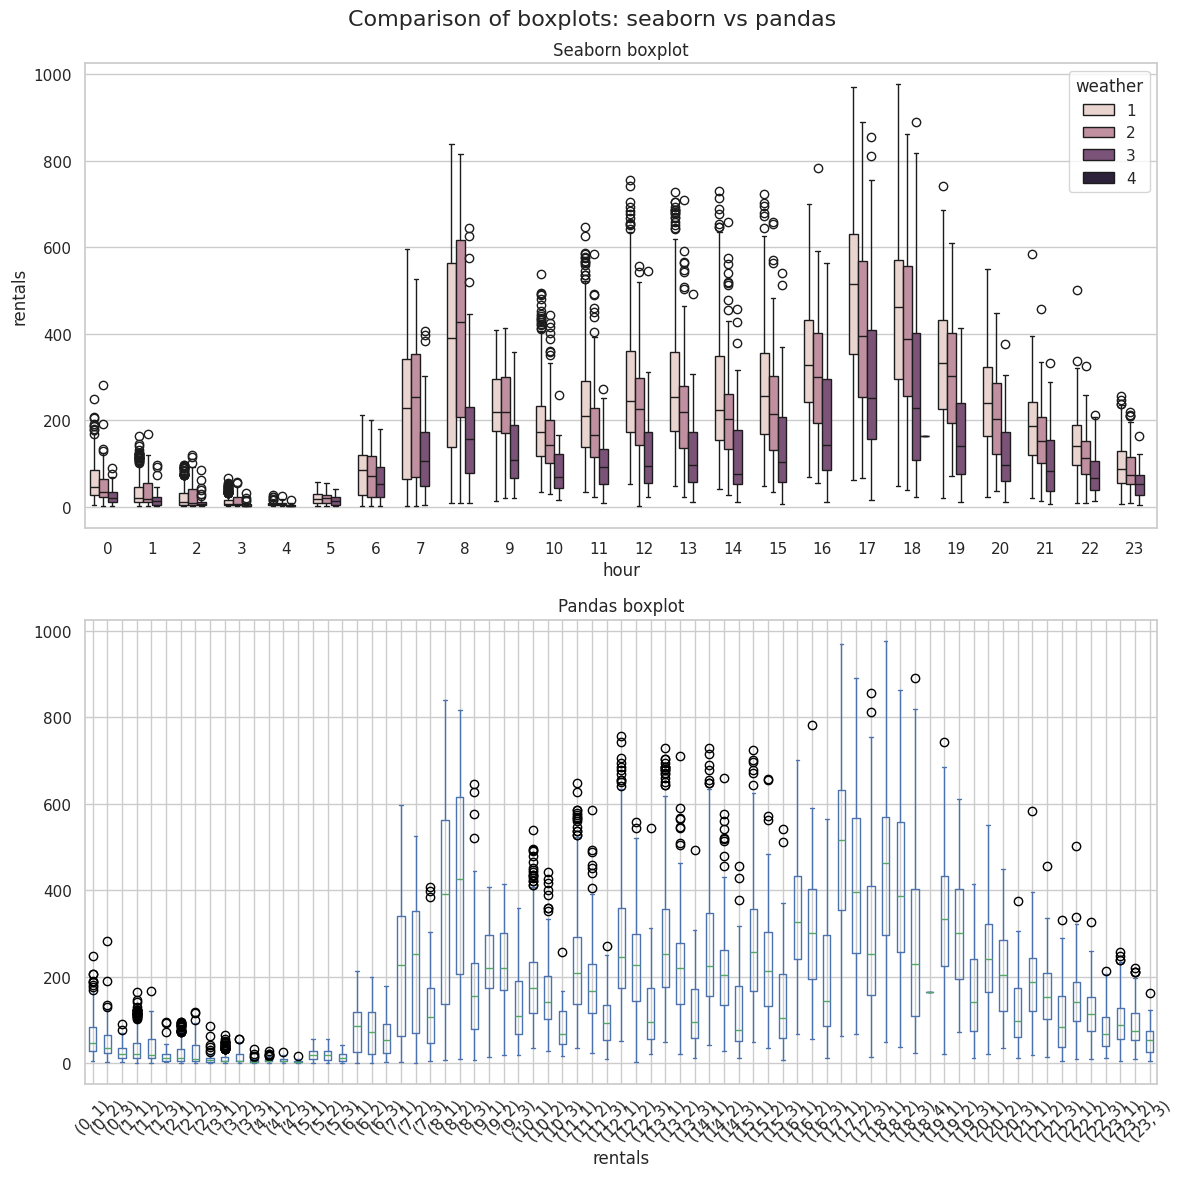

In [12]:
fig,ax=plt.subplots(2,1,figsize=(12,12))
sns.boxplot(data=df,x='hour',y='count',hue='weather',ax=ax[0])
ax[0].set_ylabel('rentals')
ax[0].set_title('Seaborn boxplot')
df.plot.box(column='count',by=['hour','weather'],ax=ax[1])
ax[1].set_xlabel('rentals')
ax[1].set_title('Pandas boxplot')
ax[1].tick_params(axis='x',rotation=45)
plt.suptitle('Comparison of boxplots: seaborn vs pandas',fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
#Seaborn boxplot more flexible then Pandas and allows to use 3 arguments more efficiently
#while in Pandas it works via multiindex what makes graph less readable.
#Plus seaborn adds automatically colormap what also helps to understand the grafh much better.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


In [14]:
num_cols = df.select_dtypes(include='number')
num_cols

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,week,weekday_num,year,month,hour,weather_season_india
datetime,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,52,5,2011,1,0,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,52,5,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,52,5,2011,1,2,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,52,5,2011,1,3,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,52,5,2011,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19,51,2,2012,12,19,1
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,19,51,2,2012,12,20,1
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,19,51,2,2012,12,21,1


In [18]:
correlation = df[['holiday',	'workingday','temp','atemp','humidity','windspeed','casual','registered','count','year']].corr()

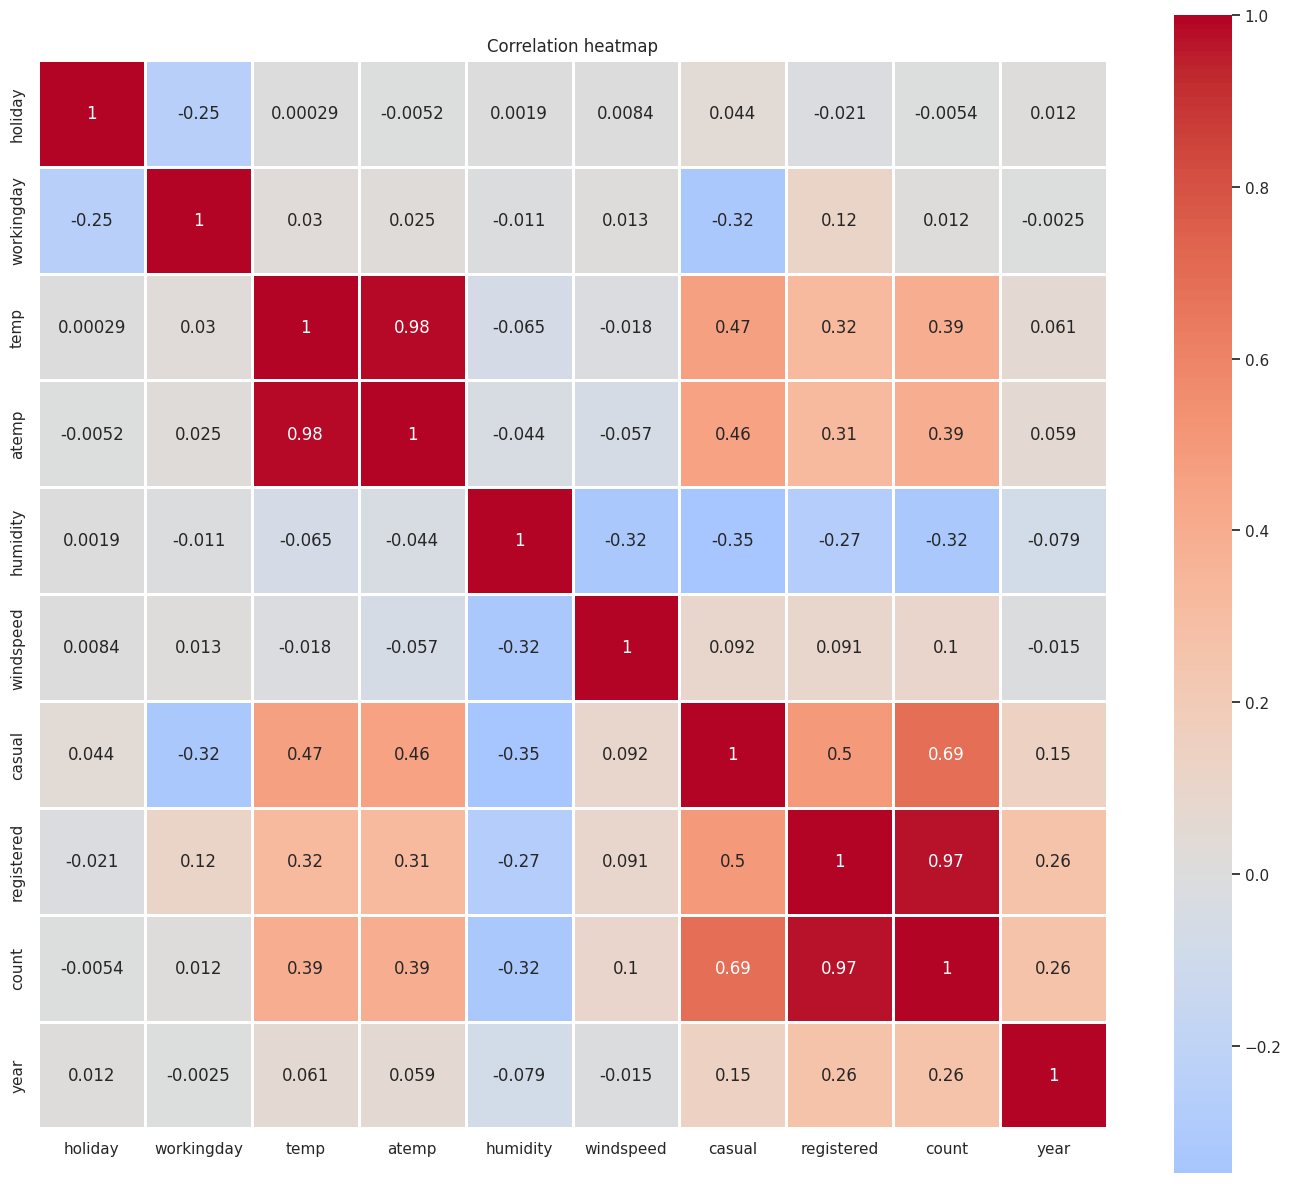

In [20]:
plt.figure(figsize=(14,12))
sns.heatmap(correlation,annot=True,cmap='coolwarm',center=0,square=True,linewidths=1)
plt.title('Correlation heatmap')
plt.tight_layout()
plt.show()

In [ ]:
#The strongest positive correlative connection with count have columns registered users,
#then with colomn usual. A bit less strong with temp and atemp.
#Between temp and atemp strong positive correlative connection .
#I think its due to the fact temp and atemp its very close indicators.
#Workingday and casual users have negative connection.Also humidity with columns windspeed and count.


## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за кварталами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому кварталі найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


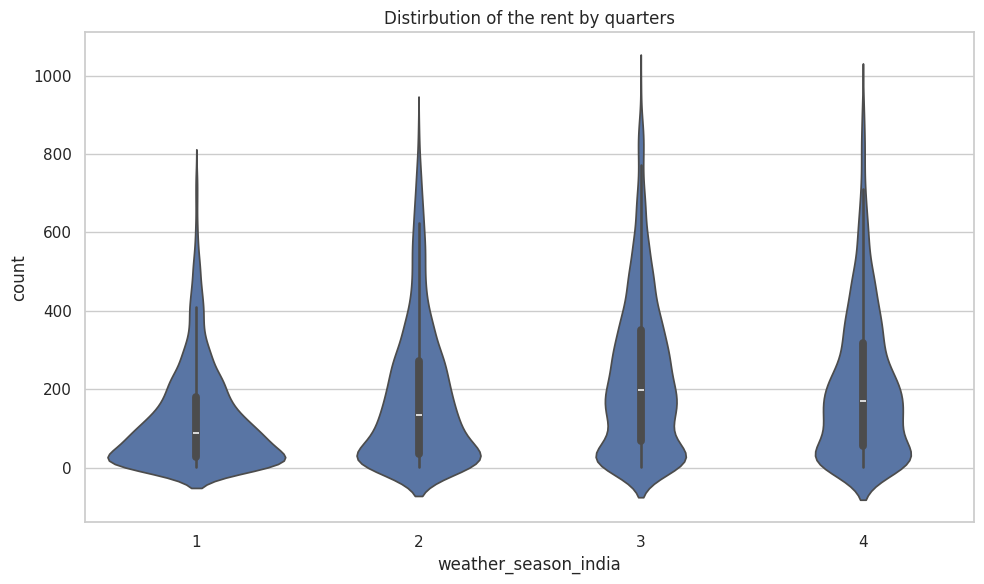

In [22]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df,x='weather_season_india',y='count')
plt.title('Distirbution of the rent by quarters')
plt.tight_layout()
plt.show()

In [ ]:
#The width at the point of axex y = density of data.The shape if it its KDE.
#Then wider then more data at that point and then tigher then less amount of data.
#Third and fourth quarters have biggest variation .
#The privilege of violinplot to regular boxplot
#is that we also have KDE beside other information.


## Завдання 6 : Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте season (квартал).

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше відрізняється між кварталами?

In [30]:
df_sample= df[['temp','humidity','windspeed','count','weather_season_india']]

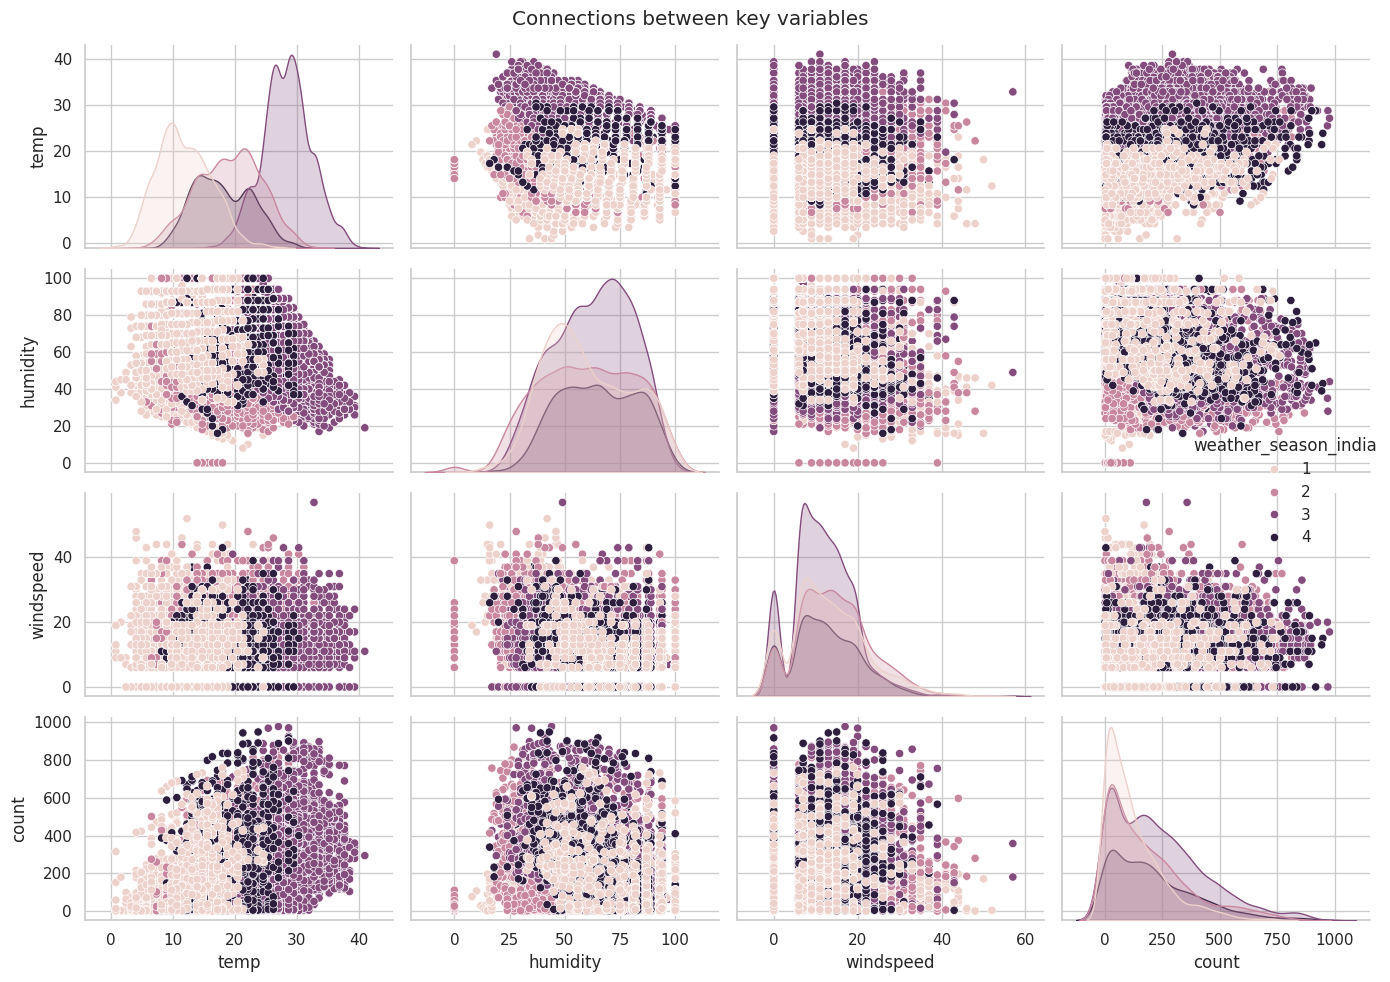

In [31]:
sns.pairplot(df_sample,height= 2.5,aspect=1.2,hue='weather_season_india')
plt.suptitle('Connections between key variables')
plt.tight_layout()
plt.show()

In [ ]:
#Between temp and count the strongest connection.The biggest difference between quarters are also there.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

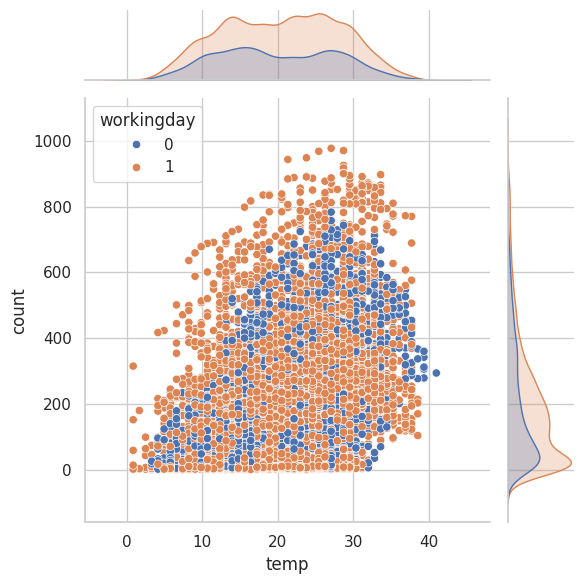

In [33]:
sns.jointplot(data=df,x='temp',y='count',hue='workingday')
plt.tight_layout()
plt.show()

In [ ]:
#On the edges we are seeing marginal distirbution of variable temp and count for working and days off .
#Working days have higher count indicator then days off what means that users more freqantly using service on working days.